# Naive Bayes Project

**AIM:** To create a review classifier for the Google Play store.

--------------------------------------------------------------------------------------------------------------

**Step 1:** Loading the dataset

In [84]:
import pandas as pd

raw_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv")

raw_data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


Will do a first review of the quality of the dataset:

In [ ]:
# Checking for missing values:
missing_data = raw_data.isnull().sum()
print("Missing data in each column:\n", missing_data)

# Summary of missing values:
total_missing = missing_data.sum()
print(f"\nTotal missing values in the dataset: {total_missing}")

Missing data in each column:
 package_name    0
review          0
polarity        0
dtype: int64

Total missing values in the dataset: 0


In [86]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


It seems like the data is complete, and we have a good quality dataset.

**Step 2:** Study of variables and their content.

Following the instruciotns: As can be seen in the dataset <ins>we have only 3 variables: 2 predictors and a dichotomous label</ins>.

Of the two predictors, we are really only interested in the **'review'** variable, given the information we are after i.e. classifying a comment as positive or negative, will depend on its content, and not on the '**package_name**' from which it was written. Therefore, the package_name variable can and should be removed:

In [87]:
# Removing the 'package_name' column:

raw_data = raw_data.drop(columns=["package_name"])

raw_data.head()

,review,polarity
0,privacy at least put some option appear offli...,0
1,"messenger issues ever since the last update, ...",0
2,profile any time my wife or anybody has more ...,0
3,the new features suck for those of us who don...,0
4,forced reload on uploading pic on replying co...,0


Although it is not necessary for the predictor variables to be normalized, we can not work with plain text, hence will to a bit of process:

1. **Remove spaces**.
2. **lowercase.**

In [101]:
# Cleaning the 'review' column:
# 1. Strip spaces and
# 2. convert to lowercase.

raw_data["review"] = raw_data["review"].str.strip().str.lower()

# Checking the changes made:
print(raw_data["review"].head())

0    privacy at least put some option appear offlin...
1    messenger issues ever since the last update, i...
2    profile any time my wife or anybody has more t...
3    the new features suck for those of us who don'...
4    forced reload on uploading pic on replying com...
Name: review, dtype: object


Saving the datset

In [89]:
# Save the cleaned dataset to a CSV file
cleaned_dataset_path = "/workspaces/Naive-Bayes-Project-.FGM/data/processed/cleaned_data.csv"  # Adjust the path if necessary
raw_data.to_csv(cleaned_dataset_path, index=False)

print(f"Cleaned dataset saved successfully to '{cleaned_dataset_path}'")

Cleaned dataset saved successfully to '/workspaces/Naive-Bayes-Project-.FGM/data/processed/cleaned_data.csv'


All good so far 👌😁

Text can not be processed by code, we need to convert it into numerical feautures. So will transform all the comments loaded in the 'review' column into data by **transforming the text into a word count matrix.**

- A. Split the dataset into Train and Test.
- B. Will use the training dataset to train the trasnformer and apply it in test.

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split the dataset into training and testing sets
X = raw_data["review"]  # Features (text data)
y = raw_data["polarity"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [91]:
# Initialize CountVectorizer
vec_model = CountVectorizer(stop_words="english")

# Transform the text data
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

# Display the shapes to confirm transformation
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (712, 3272)
Testing data shape: (179, 3272)


**Step 3:** Building the 'Naive Bayes' model.

When applying the 'Naive Bayes', we have to consider which alternative to be chosen:
- GaussianNB.
- MultinomialNB.
- BernoulliNB.

Based on the characteristics of our datasatet will have to choose the best model orientation.

In our case would apply 2 of these tree: **BernoulliNB**, **MultinomialNB**.

- *BernoulliNB:* While it can work for our dataset, it loses some granularity since it ignores the frequency of words and considers only their presence. Which is what we need in our study.

- *MultinomialNB:* It is ideal for text classification problems like ours, where CountVectorizer produces a sparse matrix of word frequencies. Also, works well for applications like spam detection, <ins>sentiment analysis</ins>, or review classification.

**Recommendation:**
<ins>MultinomialNB</ins> is the most appropriate model for this dataset and purpose. The dataset uses word frequencies as features, and we want to leverage their contribution to classifying polarity effectively 💪

In [92]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)

MultinomialNB()

In [93]:
# Making predictions:
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

# Evaluating the model:

# 1. Training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy (MultinomialNB): {train_accuracy:.2f}")

# 2. Test accuracy:
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy (MultinomialNB): {test_accuracy:.2f}")

Training Accuracy (MultinomialNB): 0.96
Test Accuracy (MultinomialNB): 0.85


Is an EXCELLENT MODEL!! 🙌


Classification Report (Test Data - MultinomialNB):
              precision    recall  f1-score   support

    Negative       0.84      0.96      0.90       117
    Positive       0.89      0.66      0.76        62

    accuracy                           0.85       179
   macro avg       0.87      0.81      0.83       179
weighted avg       0.86      0.85      0.85       179



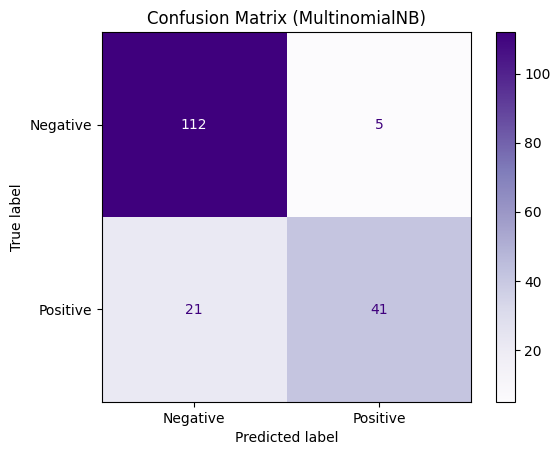

In [94]:
# Classification report for test data
print("\nClassification Report (Test Data - MultinomialNB):")
print(classification_report(y_test, y_test_pred, target_names=["Negative", "Positive"]))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative", "Positive"])
disp.plot(cmap="Purples")
plt.title("Confusion Matrix (MultinomialNB)")
plt.show()

The model is excelent at predicting the true positives, and true negatives, leaving only 21 positive comments laveled as negative. Fantastic model.

**Step 4.** Training the Model with the two other implementations and comparision with our selection.


### Evaluating GaussianNB ###


Training Accuracy (GaussianNB): 0.98
Test Accuracy (GaussianNB): 0.82

Classification Report (Test Data):
              precision    recall  f1-score   support

    Negative       0.84      0.89      0.86       117
    Positive       0.76      0.68      0.72        62

    accuracy                           0.82       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.81      0.82      0.81       179



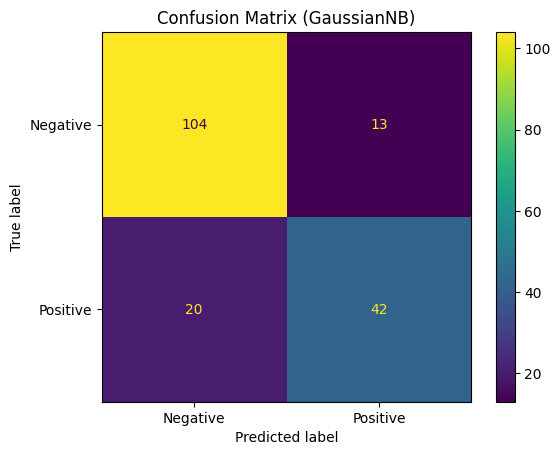


### Evaluating BernoulliNB ###
Training Accuracy (BernoulliNB): 0.92
Test Accuracy (BernoulliNB): 0.78

Classification Report (Test Data):
              precision    recall  f1-score   support

    Negative       0.76      0.97      0.85       117
    Positive       0.87      0.44      0.58        62

    accuracy                           0.78       179
   macro avg       0.82      0.70      0.72       179
weighted avg       0.80      0.78      0.76       179



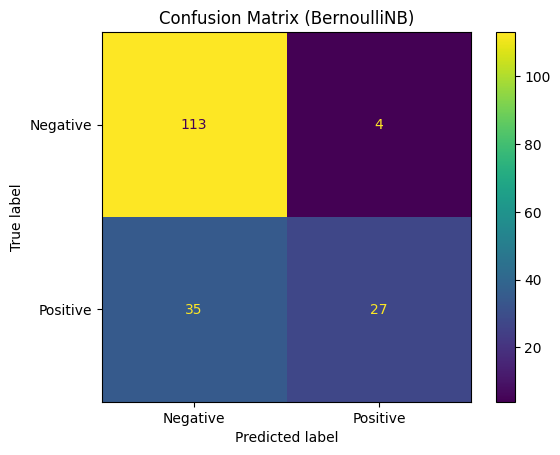


### Summary of Naive Bayes Models ###
GaussianNB - Train Accuracy: 0.98, Test Accuracy: 0.82
BernoulliNB - Train Accuracy: 0.92, Test Accuracy: 0.78


In [95]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the models
models = {
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
    }

results = {}

for model_name, model in models.items():
    print(f"\n### Evaluating {model_name} ###")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict for train and test datasets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store results for comparison
    results[model_name] = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    }
    
    # Print accuracies
    print(f"Training Accuracy ({model_name}): {train_accuracy:.2f}")
    print(f"Test Accuracy ({model_name}): {test_accuracy:.2f}")
    
    # Classification report
    print("\nClassification Report (Test Data):")
    print(classification_report(y_test, y_test_pred, target_names=["Negative", "Positive"]))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative", "Positive"])
    disp.plot(cmap="viridis")
    plt.title(f"Confusion Matrix ({model_name})")
    plt.show()

# Print summary of accuracies
print("\n### Summary of Naive Bayes Models ###")
for model_name, metrics in results.items():
    print(f"{model_name} - Train Accuracy: {metrics['Train Accuracy']:.2f}, Test Accuracy: {metrics['Test Accuracy']:.2f}")


As it is shown right above, the **MultinomialNB (Train Accuracy: 0.96, Test Accuracy: 0.85)**, is the best out of the three of them.

HOWEVER!

- Th GaussianNB is very close in accuracy.

- Bernoulli is not as close to MultinomialNB as expected.

**Step 5:** MultinomialNB model optimisation.

To optimize the MultinomialNB model using RandomizedSearchCV, we can tweak hyperparameters like alpha and fit_prior.

In [96]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define hyperparameter grid for RandomizedSearchCV
hyperparams = {
    "alpha": np.linspace(0.01, 1, 3, 10, 200), # Range of alpha values to try
    "fit_prior": [True, False]             # Whether to learn class priors or set them as uniform
}

# Initialize MultinomialNB model
model = MultinomialNB()

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    model, 
    hyperparams, 
    n_iter=50,            #<---------------------- Number of iterations for random search
    scoring="accuracy",   #<---------------------- We aim to maximize accuracy
    cv=5,                 #<---------------------- Cross-validation folds
    random_state=42,      #<---------------------- Set random seed for reproducibility
    n_jobs=-1             #<---------------------- Use all CPU cores for faster computation
)

# Fit the random search
random_search.fit(X_train, y_train)

# Best parameters found
print("Best Hyperparameters:", random_search.best_params_)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'fit_prior': False, 'alpha': np.float64(0.495)}


/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/naive_bayes.py", line 760, in fit
    alpha = self._check_alpha()
  File "/home/vscode

Optimized Train Accuracy: 0.96
Optimized Test Accuracy: 0.88

Classification Report (Test Data - Optimized Model):
              precision    recall  f1-score   support

    Negative       0.89      0.93      0.91       117
    Positive       0.86      0.79      0.82        62

    accuracy                           0.88       179
   macro avg       0.88      0.86      0.87       179
weighted avg       0.88      0.88      0.88       179



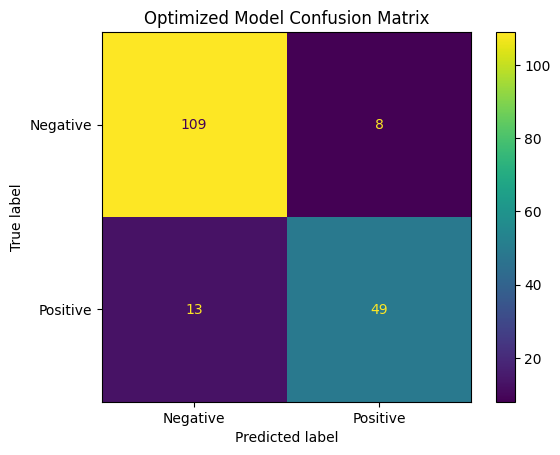

In [97]:
# Evaluate the best model found from random search
best_model = random_search.best_estimator_

# Predictions with the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Print training and test accuracy
print(f"Optimized Train Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f"Optimized Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")

# Classification report for the optimized model
print("\nClassification Report (Test Data - Optimized Model):")
print(classification_report(y_test, y_test_pred, target_names=["Negative", "Positive"]))

# Confusion matrix for optimized model
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative", "Positive"])
disp.plot(cmap="viridis")
plt.title("Optimized Model Confusion Matrix")
plt.show()

We have obtained a better result:

Optimized Train Accuracy: 0.96

Optimized Test Accuracy: 0.88

Model OPTIMISED!!⭐

**Step 6:** Now will save the model.

In [98]:
from pickle import dump

dump(model, open("/workspaces/Naive-Bayes-Project-.FGM/models/naive_bayes_optimized_model.sav", "wb"))

print ("Model saved successfully!!⭐")

Model saved successfully!!⭐


----------------------------------------------------------------------------------------

# Exploring other alternatives

**Extra Question:** Which other SUPERVISED MODELS that we studied during the curse can beat 'Naive Bayes' model??

Considerations:

- <ins>Dataset characteristics</ins>: We are working with text data (Playstore reviews), so **models that handle text data effectively are crucial**.

- <ins>Naive Bayes</ins> is often a strong baseline for text classification, especially when features are conditionally independent. However, **in cases where features are correlated, more complex models might perform better**.

Alternative Models:

Given the dataset and the object of the study, and reviewing the projects we have done in the course,  I recommend trying **Logistic Regression** and **Random Forest**, which are powerful alternatives to Naive Bayes for text classification.

1. Logistic Regression:

Why: Logistic regression is often a <ins>good choice for binary and multiclass classification problems</ins>. It's particularly powerful when the dataset has linearly separable classes or when features are correlated. **Logistic Regression**, unlike Naive Bayes, <ins>doesn't assume independence between features and can capture more complex relationships.</ins> 

2. Random Forest:

Why: Random Forest is an ensemble method that aggregates the results of many decision trees, making it less prone to overfitting and often more powerful than individual models like Naive Bayes. **Random Forest** <ins>works well even with non-linear relationships in the data, which might be relevant for our dataset if there's any complex interaction between features.</ins>

Will traing both models and compare the results.

- Let’s start by implementing Logistic Regression first:

Training Accuracy (Logistic Regression): 1.00
Test Accuracy (Logistic Regression): 0.83

Classification Report (Logistic Regression - Test Data):
              precision    recall  f1-score   support

    Negative       0.86      0.89      0.87       117
    Positive       0.78      0.73      0.75        62

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



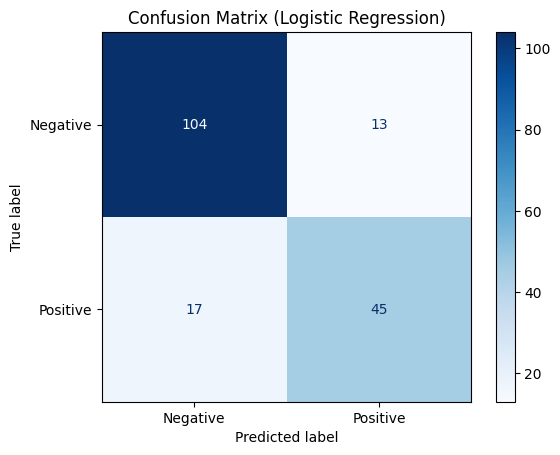

In [99]:
# Starting with Logistic Regression:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_train_pred_log_reg = log_reg_model.predict(X_train)
y_test_pred_log_reg = log_reg_model.predict(X_test)

# Train accuracy
train_accuracy_log_reg = accuracy_score(y_train, y_train_pred_log_reg)
print(f"Training Accuracy (Logistic Regression): {train_accuracy_log_reg:.2f}")

# Test accuracy
test_accuracy_log_reg = accuracy_score(y_test, y_test_pred_log_reg)
print(f"Test Accuracy (Logistic Regression): {test_accuracy_log_reg:.2f}")

# Classification report
print("\nClassification Report (Logistic Regression - Test Data):")
print(classification_report(y_test, y_test_pred_log_reg, target_names=["Negative", "Positive"]))

# Confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_test_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log_reg, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()


- Next, we'll train a Random Forest model:

Training Accuracy (Random Forest): 1.00
Test Accuracy (Random Forest): 0.82

Classification Report (Random Forest - Test Data):
              precision    recall  f1-score   support

    Negative       0.83      0.91      0.87       117
    Positive       0.79      0.66      0.72        62

    accuracy                           0.82       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.82      0.82      0.82       179



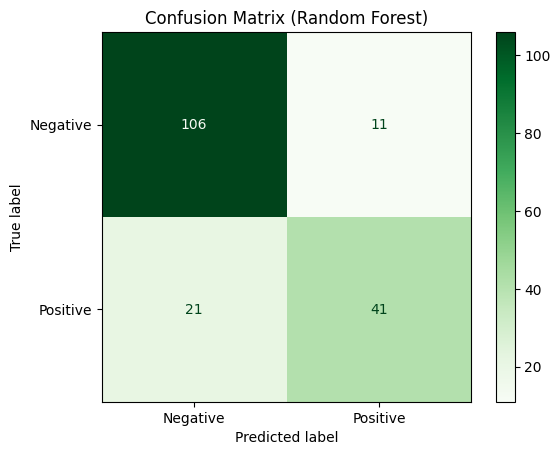

In [100]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Train accuracy
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"Training Accuracy (Random Forest): {train_accuracy_rf:.2f}")

# Test accuracy
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Test Accuracy (Random Forest): {test_accuracy_rf:.2f}")

# Classification report
print("\nClassification Report (Random Forest - Test Data):")
print(classification_report(y_test, y_test_pred_rf, target_names=["Negative", "Positive"]))

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=["Negative", "Positive"])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

**RESULTS:**

- 'Naive Bayes Optimised':

Optimized Train Accuracy: 0.96

Optimized Test Accuracy: 0.88

- 'Logistic Regression':

Training Accuracy (Logistic Regression): 1.00

Test Accuracy (Logistic Regression): 0.83

- 'Random Forest':

Training Accuracy (Random Forest): 1.00

Test Accuracy (Random Forest): 0.82

Although further optimisations may be needed to get the best from the other models, so far, <ins>**the 'Naive Bayes' model is the best to determine the sentiment in the commnets**.</ins>